Mounted at /content/drive
youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object


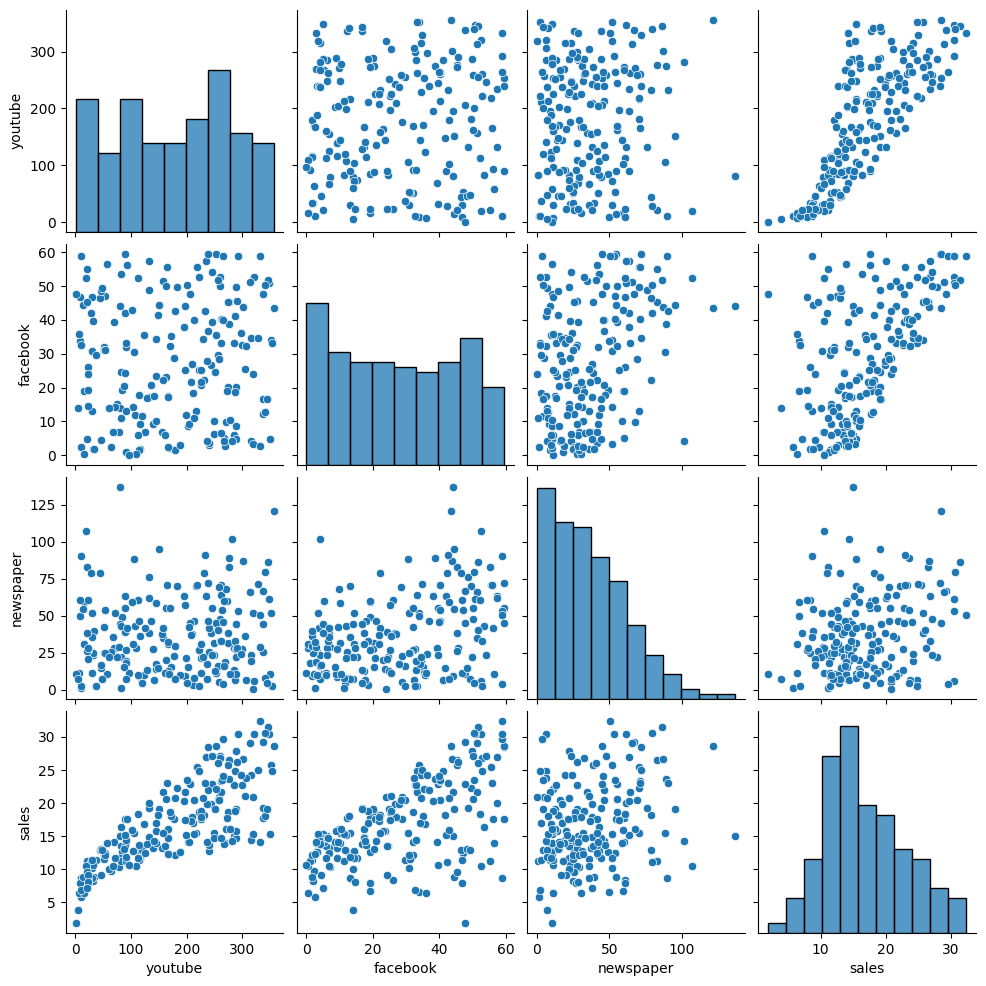

0.8333333333333334
[[ 8  0  4]
 [ 0  6  2]
 [ 2  2 36]]
              precision    recall  f1-score   support

        High       0.80      0.67      0.73        12
         Low       0.75      0.75      0.75         8
      Medium       0.86      0.90      0.88        40

    accuracy                           0.83        60
   macro avg       0.80      0.77      0.79        60
weighted avg       0.83      0.83      0.83        60

On train-set, the accuracy of decision_tree: 1.00
On test-set, the accuracy of decision_tree: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


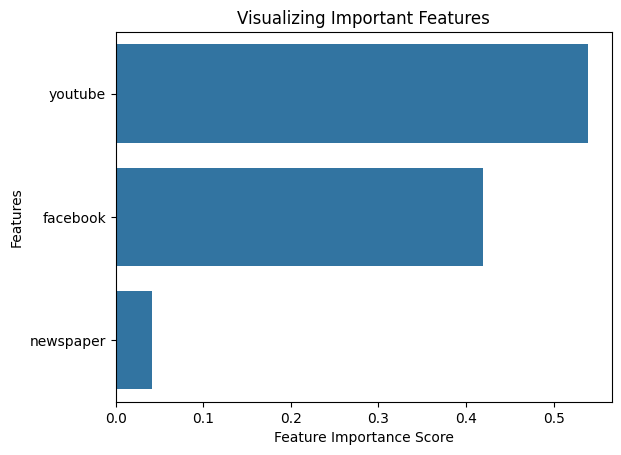

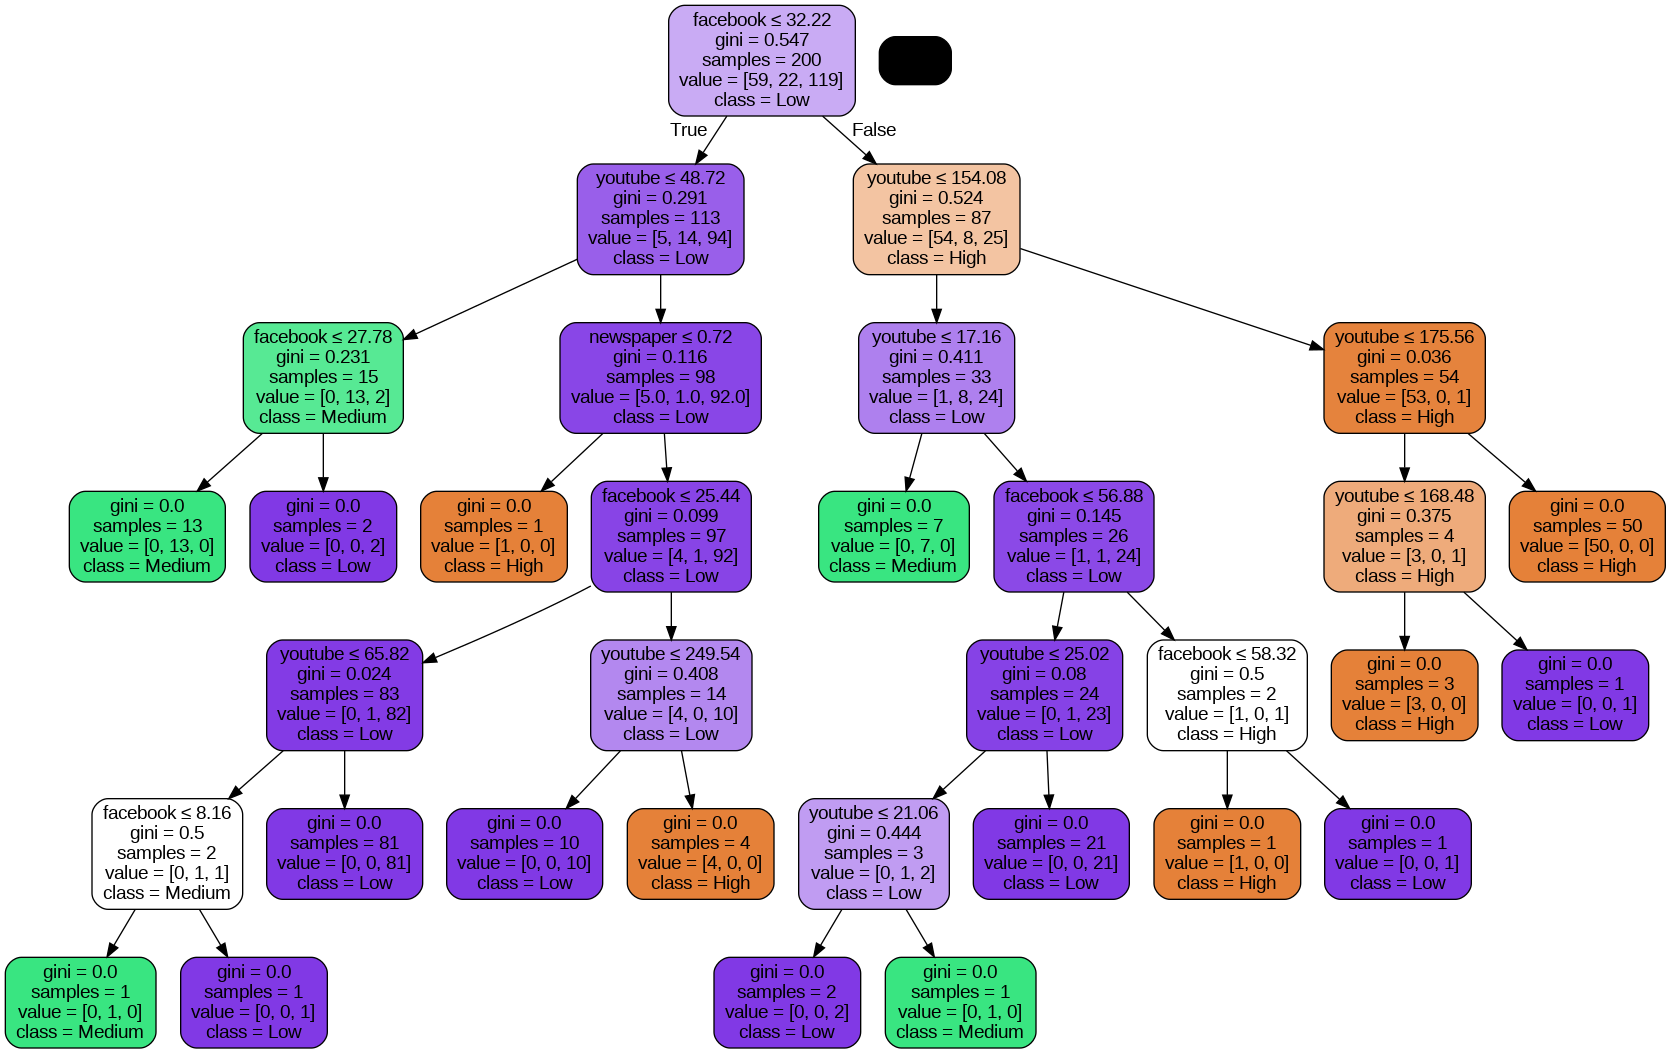

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Bước 1: import libraries
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
os.chdir('/content/drive/My Drive/Datamining/Exercises')
#Load data-set
dataset=pd.read_excel('marketing.xlsx')
dataset.head()
#Bước 2: Mo ta + Thong ke
dataset.describe()
#Buoc 3: Visualize data-set
print(dataset.dtypes)
sns.pairplot(dataset)
plt.show()
#Bước 4: Discretization (Low, Medium, High) using cut method in pandas package
cut_label=['Low','Medium','High']
cut_bins=[0,10,20,100]
dataset['sales']=pd.cut(dataset['sales'],bins=cut_bins,labels=cut_label)
dataset
#Buoc 5: Train-set + Build DT
from sklearn.model_selection import train_test_split
array=dataset.values
X=array[:,0:3]
Y=array[:,3]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train,Y_train)
# Bước 6: Tính toán độ chính xác (accuracy), precision, recall, F-measure ...
prediction = decision_tree.predict(X_test)

# In ra kết quả đánh giá mô hình
print(accuracy_score(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))
print(classification_report(Y_test, prediction))

# In ra độ chính xác trên tập huấn luyện và kiểm tra
print('On train-set, the accuracy of decision_tree: {:.2f}'.format(decision_tree.score(X_train, Y_train)))
print('On test-set, the accuracy of decision_tree: {:.2f}'.format(decision_tree.score(X_test, Y_test)))
#Buoc 7: Prediction với newAds

newAds=pd.DataFrame({'youtube':[120,35],'facebook':[65,50],'newspaper':[25,20]})
newAds
prediction=decision_tree.predict(newAds)
prediction
# Bước 8: Trích chọn Feature Importance
feature = dataset.columns.values[0:3]  # Chọn 3 feature đầu tiên
target = dataset['sales'].unique()  # Các lớp của cột target 'sales'

# Tính toán feature importance
feature_impacts = pd.Series(decision_tree.feature_importances_, index=feature).sort_values(ascending=False)

# Hiển thị feature importance bằng biểu đồ cột
%matplotlib inline
sns.barplot(x=feature_impacts, y=feature_impacts.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()
# Bước 9: Xây dựng mô hình cây quyết định (Decision Tree)
feature = dataset.columns.values[0:3]  # Chọn 3 feature đầu tiên
target = dataset['sales'].unique()  # Các lớp của cột target 'sales'

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus

# Tạo mô hình DecisionTreeClassifier và huấn luyện
decision_tree = DecisionTreeClassifier()
X = dataset[feature]  # Chọn các feature để huấn luyện
y = dataset['sales']  # Target variable
decision_tree.fit(X, y)

# Xuất đồ thị cây quyết định
dot_data = tree.export_graphviz(decision_tree,
                                out_file=None,
                                feature_names=feature,
                                class_names=[str(cls) for cls in target],  # Đảm bảo class_names là kiểu chuỗi
                                filled=True,
                                rounded=True,
                                special_characters=True)

# Vẽ cây quyết định
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())